## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**


### Hello ! I am Karan and in this kernel we will explore Student scores dataset.

Problem Statement: In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Imported Necessary Libraries**

**Now we will load the data**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

**Let's look over for first 5 rows**

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Also the last 5 rows**

In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**shape is used to determine the dimension's where as first element of tuple shows the number of rows and second display's the number of columns**

In [5]:
data.shape

(25, 2)

**Generate descriptive statistics.**

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Let us check whether do we have any NaN values in our tiny dataset**

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Plotting scatter plot to visualize whether what kind of relationship is there between our feature and target variable**

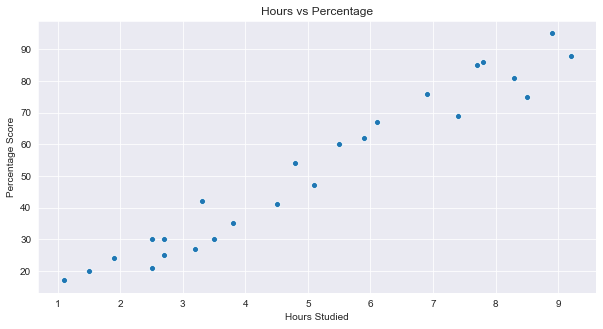

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x="Hours", y="Scores")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the scatter plot, we can figure it out that there is linear relationship between feature and target variable**

**So as there is Linear Relationship between feature and variable we can use Linear regression for further prediction**

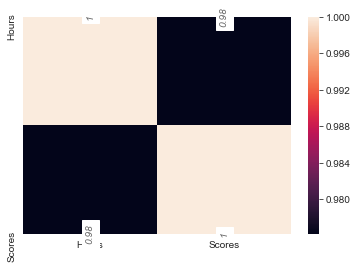

In [37]:
annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.6, 
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
sns.heatmap(data.corr(),annot = True,annot_kws =annot_kws)

**Above we can see that there is strong relationship between feature and target variable**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

**Scikit Learn has made it all easy for us**

**Now we divide our X and y into training and test data**

In [10]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**So we have divided our data into training and test where 30% data is for test and other 70% for training whereas we have set random state to 0**

# Now we will train our model with training data.

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("Coefficient of our model is:-",model.coef_[0])
print("Intercept of our model is:-",model.intercept_)

Coefficient of our model is:- 9.788566686749046
Intercept of our model is:- 2.370815382341881


**So now we plot the regression line**

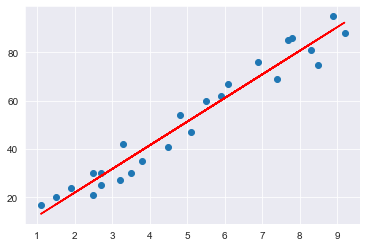

In [19]:
line = model.coef_*X + model.intercept_
plt.scatter(X,y)
plt.plot(X,line,c="red");
plt.show()

In [38]:
y_pred = model.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [41]:
new_df = pd.DataFrame({"Actual":y_test,"y_predicted":y_pred})

In [42]:
new_df

,Actual,y_predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Lets take a Sample test data to predict on it**

In [86]:
sample_x_test = pd.DataFrame({"Hours":[9.5,6.5,8.3,1,2]})

In [87]:
sample_x_test

,Hours
0,9.5
1,6.5
2,8.3
3,1.0
4,2.0


In [88]:
new_pred = model.predict(sample_x_test)

In [89]:
new_pred_ = pd.DataFrame({"predicted_score":new_pred})

In [90]:
sample_pred_df = sample_x_test.join(new_pred_)

In [91]:
sample_pred_df

,Hours,predicted_score
0,9.5,95.362199
1,6.5,65.996499
2,8.3,83.615919
3,1.0,12.159382
4,2.0,21.947949


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [95]:
from sklearn import metrics  
print('Mean Absolute Error is:-',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error is:- 4.419727808027652


In [96]:
from sklearn.metrics import r2_score
print("R-Squared score is:-",r2_score(y_test,y_pred))

R-Squared score is:- 0.9568211104435257


**We have a great accuracy score so we can say our model has done a great job**